### 创建一颗分类决策树
- 使用datasets中的红酒数据集

In [20]:
from sklearn.model_selection import train_test_split
import sklearn.datasets as dt

In [21]:
wine = dt.load_wine()
feature = wine.data
target = wine.target

In [25]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2020)

In [26]:
#建模
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.9444444444444444

#### 画出决策树
- 在anaconda的navigator中open terminal中执行：
    - conda install graphviz 
    - pip install graphviz 
    - 重启终端服务即可

In [6]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度',
                '色调','od280/od315稀释葡萄酒','脯氨酸']

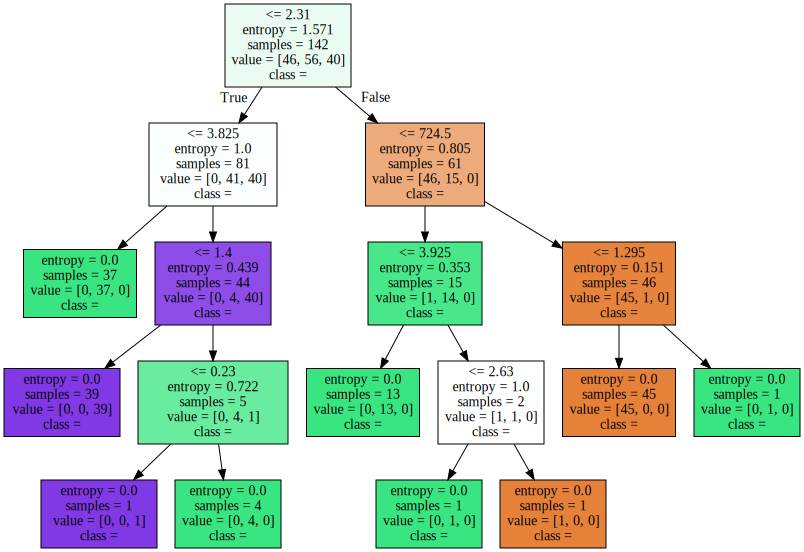

In [7]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(
    model, #训练好的决策树模型对象
    out_file=None,#图片保存路径
    feature_names=feature_name,#每一个维度特征的名称
    class_names=['琴酒','雪莉','贝尔摩德'],
    filled=True #使用不同的颜色填充不同的类别   
)
graph = graphviz.Source(dot_data)
graph

### 重要属性
clf.feature_importances_

In [56]:
model.feature_importances_ #每一个特征的重要程度

array([0.        , 0.0147939 , 0.        , 0.        , 0.        ,
       0.00896494, 0.4874266 , 0.01618011, 0.        , 0.2763588 ,
       0.03115524, 0.        , 0.16512041])

- 注意：如果返回某个特征的重要程度为0，并不一定表示该特征无意义，也有可能是因为该特征是连续性特征导致的重要程度为0.因此可以查看该特征是否为连续性特征，如果将连续性特征进行了离散后之后，该特征的重要程度依然为0.则该特征就可以被删除

In [57]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
[*zip(feature_name,model.feature_importances_)]


[('酒精', 0.0),
 ('苹果酸', 0.01479390227172555),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.008964941814890645),
 ('类黄酮', 0.48742660098390633),
 ('非黄烷类酚类', 0.01618010841300014),
 ('花青素', 0.0),
 ('颜色强度', 0.2763587955899273),
 ('色调', 0.031155237629119946),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.16512041329743002)]

### 创建一颗回归决策树


In [28]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
data = dt.fetch_california_housing()
feature = data.data
target = data.target

x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2020)

In [29]:
model = DecisionTreeRegressor(criterion='mse')
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.6576616447596809

In [30]:
model.feature_importances_

array([0.50451101, 0.04901354, 0.03157699, 0.02636751, 0.03040234,
       0.13721215, 0.11015772, 0.11075874])